<a href="https://colab.research.google.com/github/khadeejathasneem7/CognoRise-InfoTech/blob/main/Cognorise_Infotech_Project_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cognorise_Infotech_Project_Task3**

**KHADEEJA THASNEEM**

#**DIGIT RECOGNIZER**
● A digit recognition model is built using the MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits (0-9).

● The model is trained with convolutional neural network to classify the images into their respective digits.

In [1]:
#Importing the sufficient python libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Loading and preprocessing of the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalizing the pixel values to be between 0 and 1
train_images=train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images=test_images.reshape((10000,28,28,1)).astype('float32')/255

In [4]:
#One-hot encoding the labels
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [5]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                           height_shift_range=0.1,zoom_range=0.1)
datagen.fit(train_images)

In [6]:
#Defining the CNN model
from tensorflow.keras import layers, models
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [7]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Training the model with data augmentation
history=model.fit(datagen.flow(train_images,train_labels,batch_size=64),
                  steps_per_epoch=len(train_images)/64,epochs=10)

Epoch 1/10
937/937 [==============================] - 28s 22ms/step - loss: 0.3537 - accuracy: 0.8877
Epoch 2/10
937/937 [==============================] - 20s 22ms/step - loss: 0.1104 - accuracy: 0.9662
Epoch 3/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0844 - accuracy: 0.9745
Epoch 4/10
937/937 [==============================] - 21s 22ms/step - loss: 0.0679 - accuracy: 0.9789
Epoch 5/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 6/10
937/937 [==============================] - 19s 21ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 7/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0480 - accuracy: 0.9851
Epoch 8/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0428 - accuracy: 0.9863
Epoch 9/10
937/937 [==============================] - 19s 21ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 10/10
937/937 [==============================] - 20s 21ms/step - loss: 0.036

In [9]:
#Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9923
Test accuracy: 0.9922999739646912


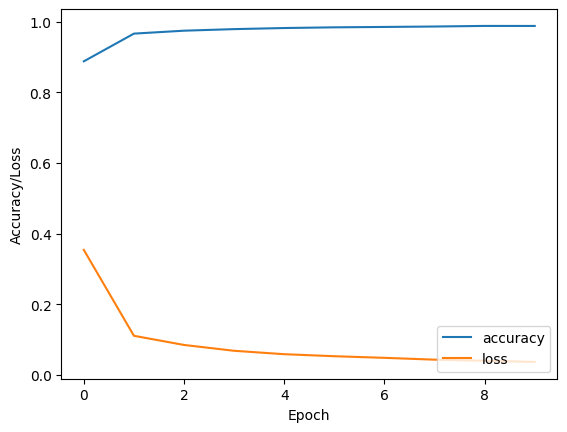

In [10]:
#Plotting the training history
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(loc='lower right')
plt.show()

In [11]:
#Make predictions on a new image
from PIL import Image
img = Image.open("handwritten5.png").convert("L")  # Load the image from local storage
img = img.resize((28, 28))  # Resize the image to match the input size expected by the model
img_array = np.array(img) / 255.0  # Convert the image to a numpy array and normalize pixel values
prediction=model.predict(img_array.reshape(1,28,28,1)).argmax(axis=1)
print("Predicted digit:", prediction[0])

1/1 [==============================] - 0s 225ms/step
Predicted digit: 5


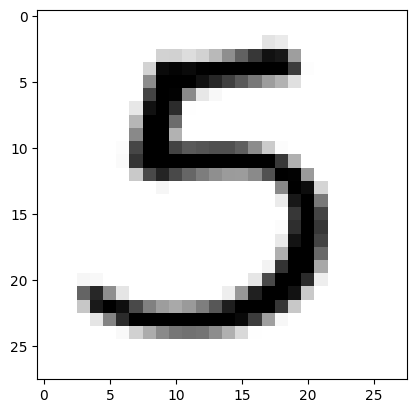

In [12]:
plt.imshow(img,cmap='gray')
plt.show()